**dataset link**:https://www.kaggle.com/datasets/thedevastator/cancer-patients-and-air-pollution-a-new-link/data

**GitHub link:**https://github.com/xGOBx/Data-Analysis-for-Lung-Cancer-Prediction

**This dataset provides information about lung cancer patients, including their demographics, health habits, and symptoms.**

**The Prediction goal is to predict the "Level" of cancer based on the dataset's features. This means determining the severity or stage of cancer (i.e., "Low," "Medium," or "High") for each patient.The goal is to also tell which features correlate to lung-cancer, weather that be one feature or multiple features together equaling lung-cancer**

**Target variable: Level**

In [29]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier


# 1. Load the dataset


In [2]:
df = pd.read_csv("cancerdata.csv")

# 2. DATA EXPLORATION

In [3]:
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [4]:
df.shape

(1000, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [6]:
df.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


# 2. Basic Data Cleaning


**Missing Values**

In [7]:
df.isnull().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [8]:
df = df.drop_duplicates()


**Columns to drop**

In [9]:
df = df.drop(['Patient Id', 'index'], axis=1)


**Changed Level to use Numerical Format**

In [10]:
df = df.replace({'Level': {'Low': 1, 'Medium': 2, 'High': 3}})

**Target Varible before Balancing**

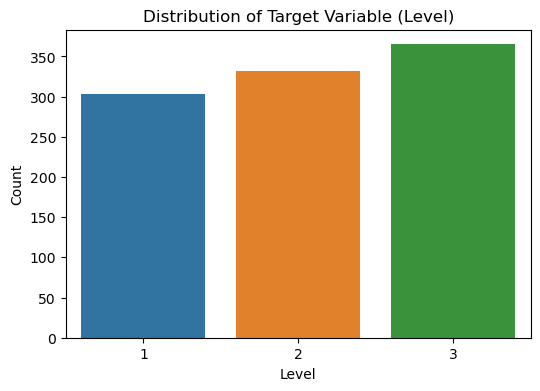

3    365
2    332
1    303
Name: Level, dtype: int64

In [11]:
class_counts = df['Level'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title("Distribution of Target Variable (Level)")
plt.xlabel("Level")
plt.ylabel("Count")
plt.show()

df['Level'].value_counts()

In [12]:
# Check if the target variable is balanced
class_counts = df['Level'].value_counts()
min_class_count = min(class_counts)

if not all(count == min_class_count for count in class_counts):
    print("Target variable is not balanced.")
    print("Balancing the target variable...")

    # under-sampling on majority class
    under_sampler = RandomUnderSampler(sampling_strategy={1: min_class_count, 2: min_class_count, 3: min_class_count}, random_state=1)
    X_under_sampled, y_under_sampled = under_sampler.fit_resample(df.drop(['Level'], axis=1), df['Level'])

    # over-sampling on minority classes
    smote = SMOTE(sampling_strategy='auto', random_state=1)
    X_resampled, y_resampled = smote.fit_resample(X_under_sampled, y_under_sampled)

    df_resampled = pd.DataFrame(X_resampled, columns=df.columns[:-1])
    df_resampled['Level'] = y_resampled
    df = df_resampled

    class_counts = df['Level'].value_counts()
    if all(count == min_class_count for count in class_counts):
        print("Target variable is balanced after resampling.")
    else:
        print("Balancing did not achieve balance.")
else:
    print("Target variable is already balanced.")

Target variable is not balanced.
Balancing the target variable...
Target variable is balanced after resampling.


**Target Varible After Balancing**

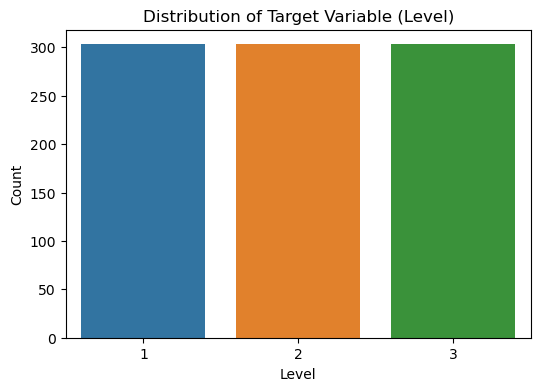

1    303
2    303
3    303
Name: Level, dtype: int64

In [13]:
class_counts = df['Level'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title("Distribution of Target Variable (Level)")
plt.xlabel("Level")
plt.ylabel("Count")
plt.show()

df['Level'].value_counts()

**Label Encoding**

In [14]:
label_encoder = LabelEncoder()
categorical_columns = ['Level']
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Data Visualization


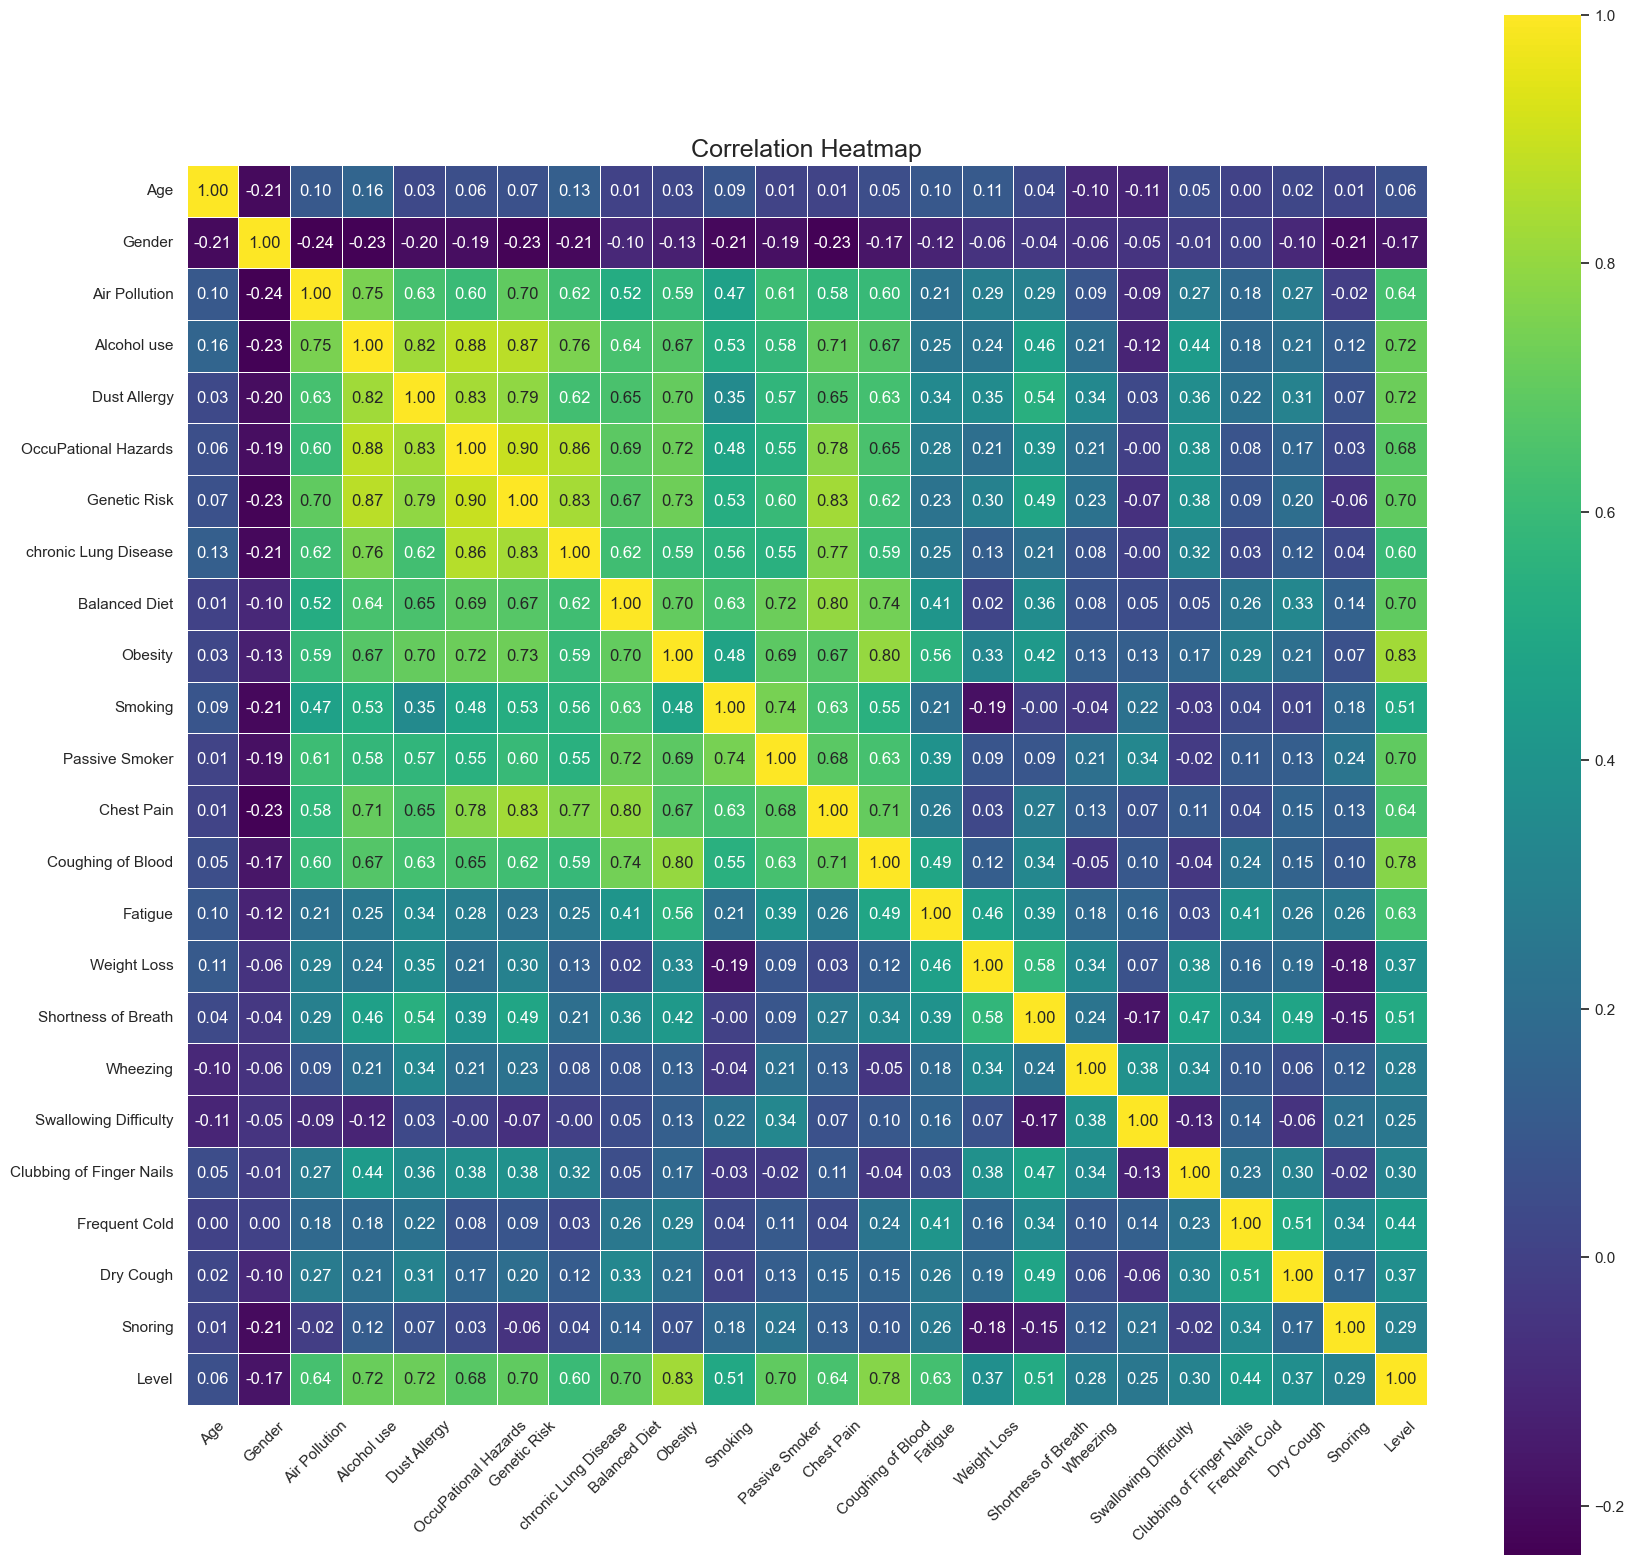

In [15]:
plt.figure(figsize=(20, 20))
correlation_matrix = df.corr()
sns.set(font_scale=1)
sns.set_style("whitegrid")
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5, square=True)
plt.title("Correlation Heatmap", fontsize=18)
plt.xticks(rotation=45)
plt.show()

# Data Splitting

   ## 1. Do you use train_test_split or cross validation to validate the result?

   **I used train_test_split for validation**

In [16]:
X=df.drop(['Level'],axis=1)
y=df['Level']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data Preprocessing

# 1. Any features Irrelevant to the target variable? 
**These feature have been removed before testing(patient_Id and Index). All features that are highly correlated many contribute to lung-cancer together and will be used for testing.**

# 2. Any high-correlated Features?
**Yes, All features that are highly correlated contribute to lung-cancer and have stayed in the dataset, all other features have been removed.**

In [18]:
# ANOVA (F-test)

# k_best to 'all' to select all features
k_best = 'all'

# Compute the F-values and p-values for each feature
f_value, p_value = f_classif(X_train, y_train)

# feature selector using the SelectKBest method with the F-test
selector_f = SelectKBest(f_classif, k=k_best)

# Fit feature selector to training data and transform to keep only the selected features
X_train = selector_f.fit_transform(X_train, y_train)
X_test = selector_f.transform(X_test)

# Get the indices of the selected features
selected_feature_indices = selector_f.get_support(indices=True)

# Creates a list of selected feature names using the column indices
selected_features = [X.columns[i] for i in selected_feature_indices]

# Convert the transformed data back to a DataFrame with the selected feature names
X_train = pd.DataFrame(X_train, columns=selected_features)
X_test = pd.DataFrame(X_test, columns=selected_features)

# Print the selected feature names, F-values, and p-values for the selected features
print("Selected Features:", selected_features)
print("F-values for selected features:", f_value[selected_feature_indices])
print("p-values for selected features:", p_value[selected_feature_indices])


Selected Features: ['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath', 'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold', 'Dry Cough', 'Snoring']
F-values for selected features: [  5.37200675  15.79090026 330.71592488 388.27838536 443.28663854
 314.9778311  348.83053611 225.80959746 481.08824525 943.61177777
 246.42903207 491.45390297 275.80032105 735.79459678 244.29967627
  85.50158267 142.21416627  85.47632989  31.96277081  86.93666357
  94.41297471  55.21720468  50.35331367]
p-values for selected features: [4.83179613e-003 1.93848334e-007 9.36548671e-103 2.64229329e-115
 1.98803475e-126 3.84195850e-099 8.18809704e-107 6.14931872e-077
 1.22029309e-133 2.12722350e-202 2.33619067e-082 1.46324691e-135
 9.04959198e-090 3.83590948e-175 8.31164

In [19]:
# Chi-squared test

# k_best to 'all' to select all features
k_best = 'all'

# chi-squared statistic and p-values for each feature
chi2_stat, p_value_chi2 = chi2(X_train, y_train)

# feature selector using the SelectKBest method
selector_chi2 = SelectKBest(chi2, k=k_best)

# training data and transform the data to keep only the selected features
X_train = selector_chi2.fit_transform(X_train, y_train)
X_test = selector_chi2.transform(X_test)

# Get the indices of the selected features
selected_feature_indices = selector_chi2.get_support(indices=True)

# selected feature names using the column indices
selected_features = [X.columns[i] for i in selected_feature_indices]

# transformes data back to a DataFrame with the selected feature names
X_train = pd.DataFrame(X_train, columns=selected_features)
X_test = pd.DataFrame(X_test, columns=selected_features)

# Print the selected feature names
print("Selected Features:", selected_features)
print()

# correlation threshold of 0.74 to remove highly correlated features
correlation_matrix = X_train.corr()
highly_correlated_features = set()
correlation_threshold = 0.74

# Iterate through the correlation matrix and find highly correlated features
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        correlation_value = correlation_matrix.iloc[i, j]
        if abs(correlation_value) > correlation_threshold:
            feature_i = correlation_matrix.columns[i]
            feature_j = correlation_matrix.columns[j]
            highly_correlated_features.add((feature_i, feature_j, correlation_value))

# Print the highly correlated features and their correlation values
print("Highly Correlated Features (above 0.74 threshold):")
for feature_i, feature_j, correlation_value in highly_correlated_features:
    print(f"{feature_i} and {feature_j} are highly correlated with a correlation value of {correlation_value:.2f}")


Selected Features: ['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath', 'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold', 'Dry Cough', 'Snoring']

Highly Correlated Features (above 0.74 threshold):
Passive Smoker and Smoking are highly correlated with a correlation value of 0.75
OccuPational Hazards and Alcohol use are highly correlated with a correlation value of 0.88
chronic Lung Disease and Alcohol use are highly correlated with a correlation value of 0.76
chronic Lung Disease and Genetic Risk are highly correlated with a correlation value of 0.84
Chest Pain and Genetic Risk are highly correlated with a correlation value of 0.83
Genetic Risk and OccuPational Hazards are highly correlated with a correlation value of 0.90
Alcohol use and A

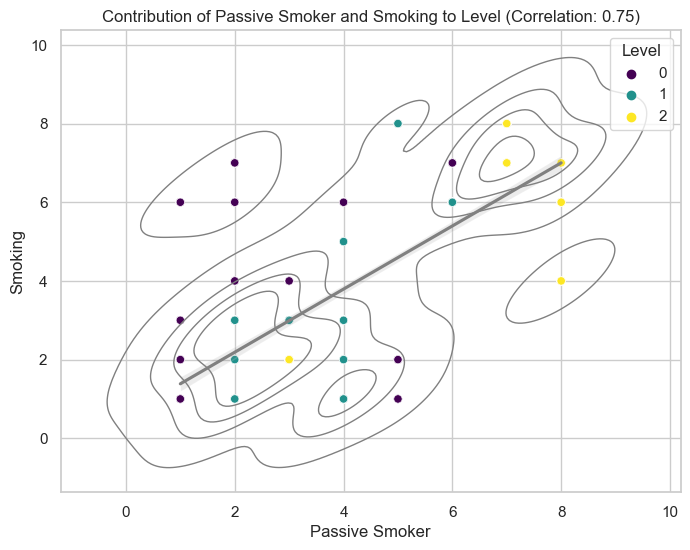

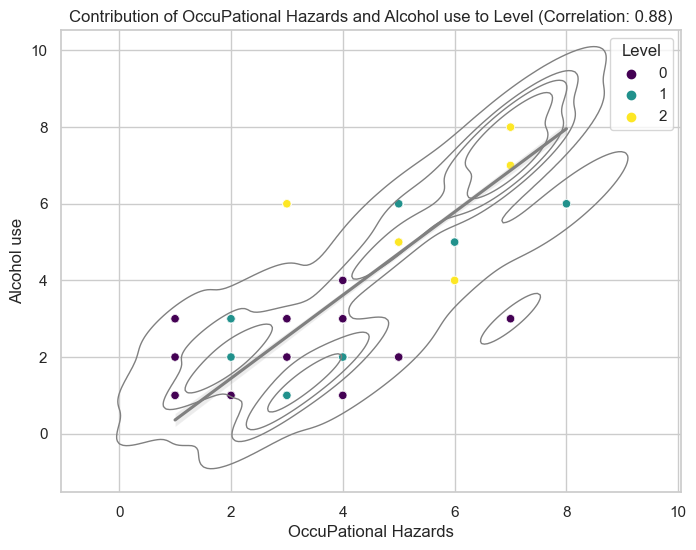

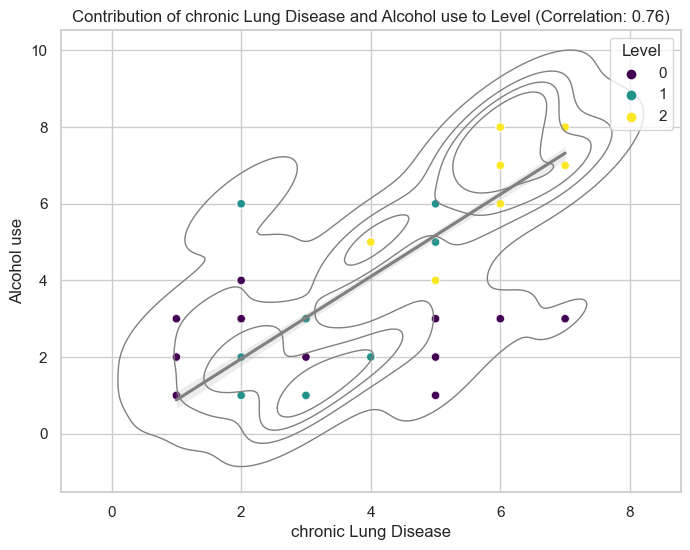

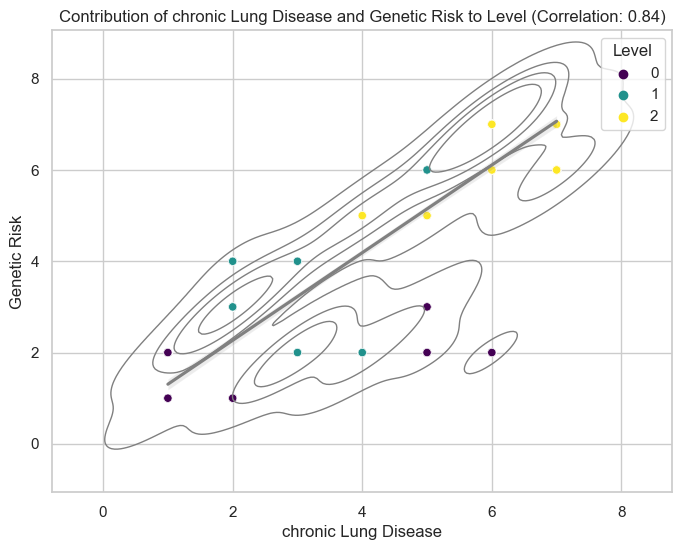

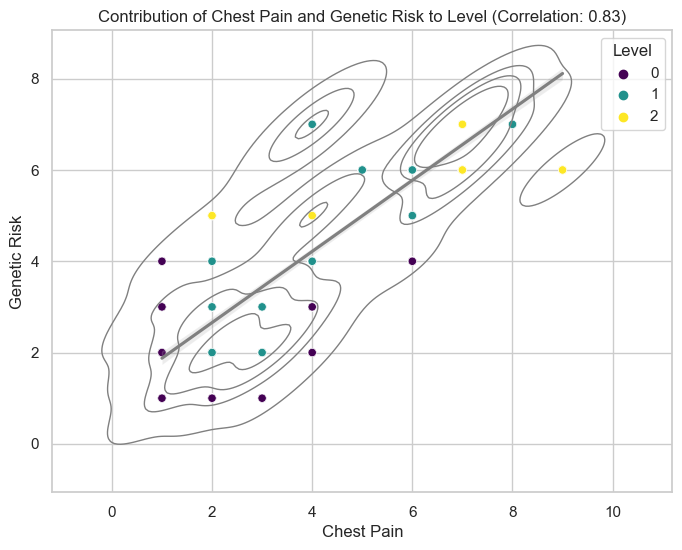

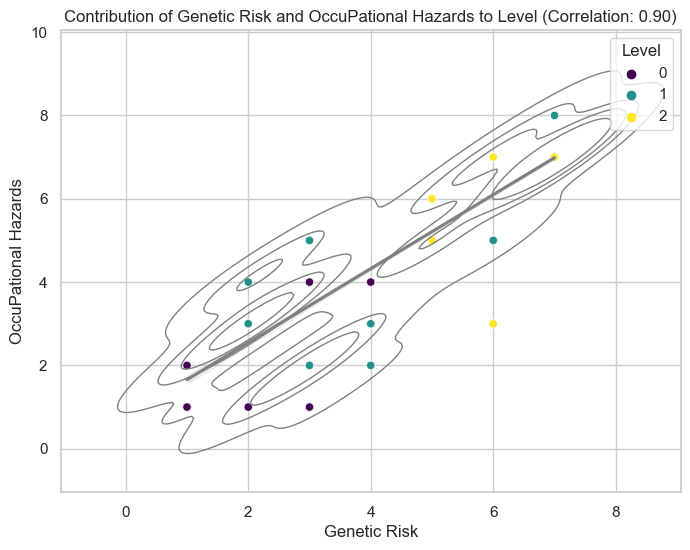

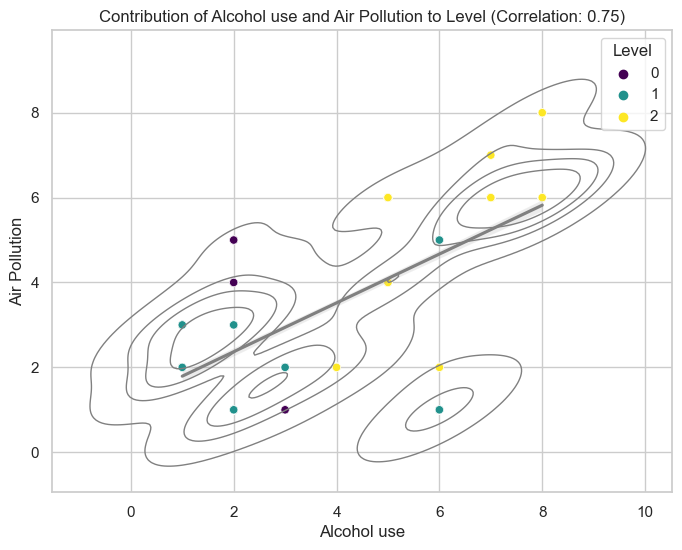

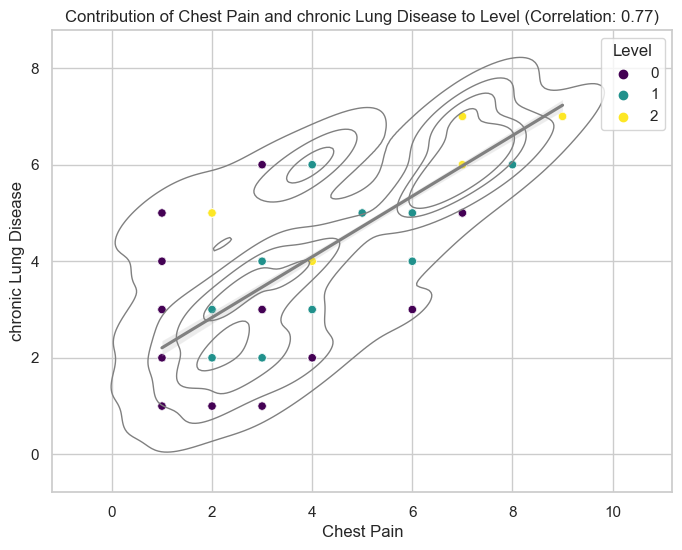

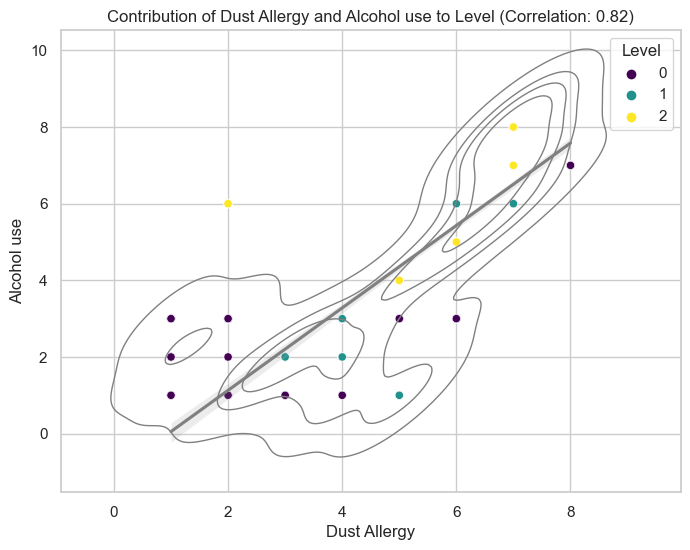

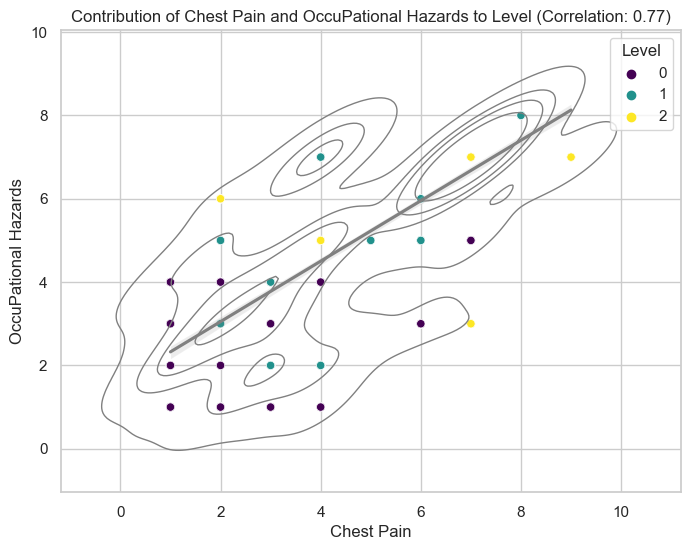

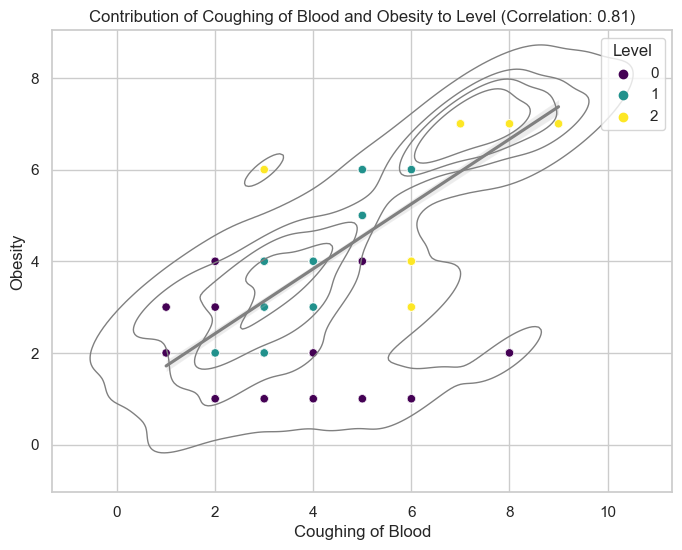

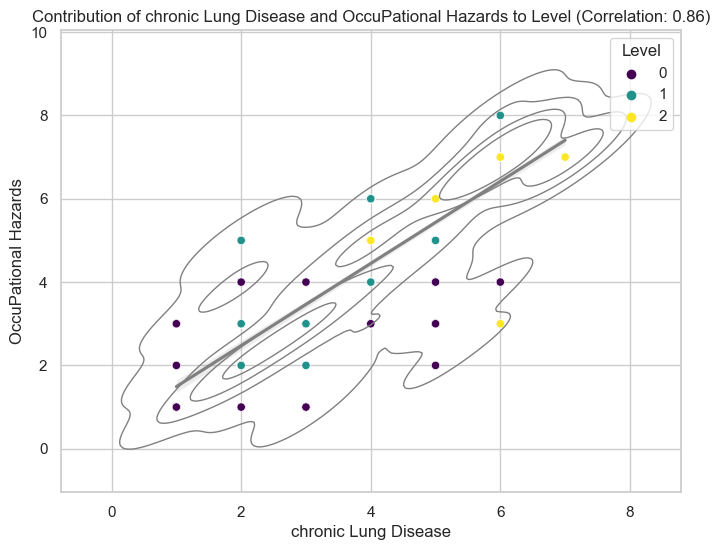

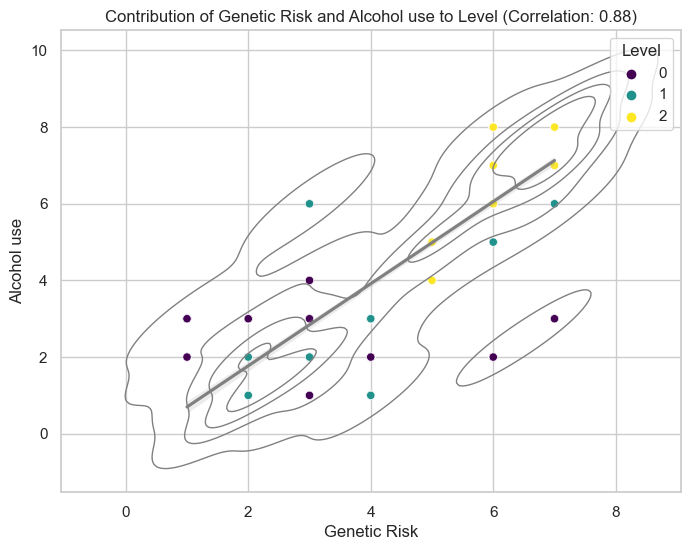

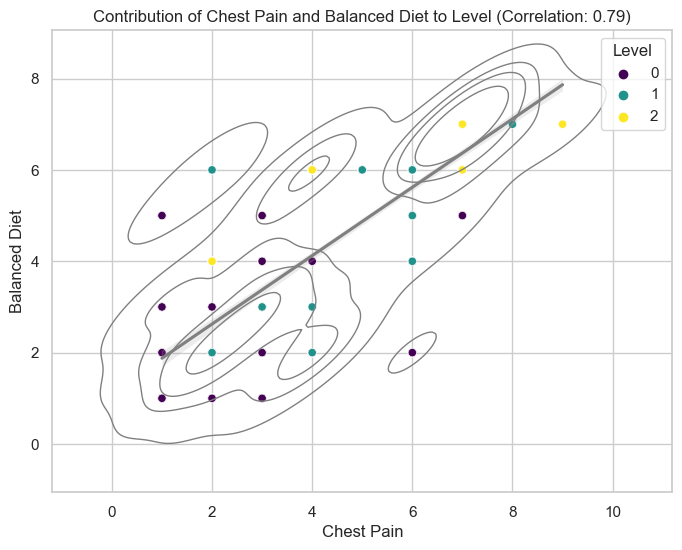

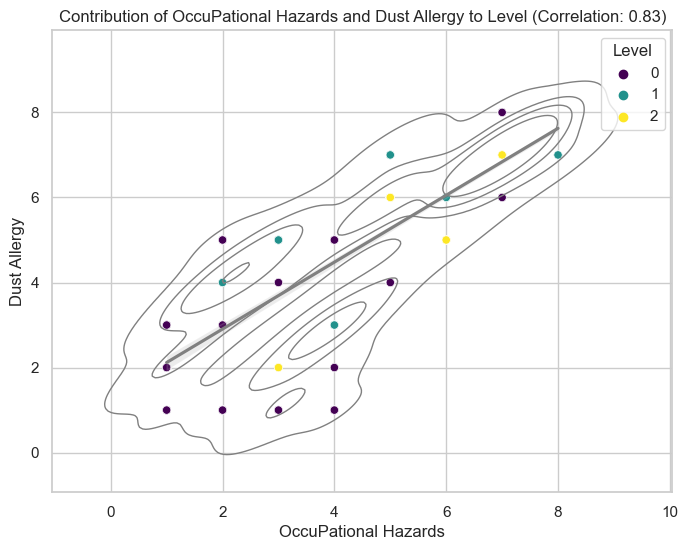

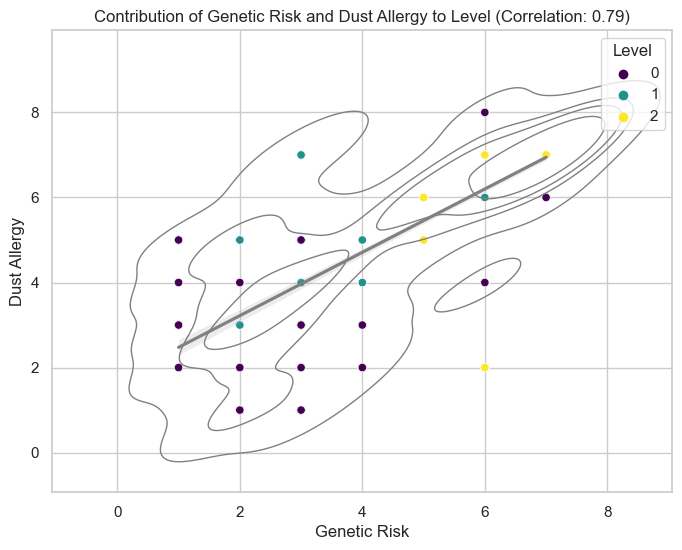

In [20]:
# Highly Correlated Features
highly_correlated_features_list = [(feature_i, feature_j, correlation_value) for feature_i, feature_j, correlation_value in highly_correlated_features]

# Iterate  highly correlated feature pairs
for feature_i, feature_j, correlation_value in highly_correlated_features_list:
    # Create a scatter plot
    plt.figure(figsize=(8, 6))
    
    # Colored data points by Level
    sns.scatterplot(x=feature_i, y=feature_j, hue='Level', data=df, palette='viridis')

    # regression line
    sns.regplot(x=feature_i, y=feature_j, data=df, scatter=False, color='gray')

    # density contours
    sns.kdeplot(x=df[feature_i], y=df[feature_j], levels=5, color='gray', linewidths=1)

    plt.title(f'Contribution of {feature_i} and {feature_j} to Level (Correlation: {correlation_value:.2f})')
    plt.xlabel(feature_i)
    plt.ylabel(feature_j)
    plt.legend(title='Level')
    
    plt.show()

# Model Building - Using RandomForest for multi-class classification

### 1. Does this data need to be balanced?
   **Yes, I have balanced the data to only use 303 patients from each cancer level**

### 2. Which algorithm is appropriate for this problem?

   **I used  the Random Forest Classifier for the problem. I used it to predict the "Level" of cancer based on the dataset features.**

### 3. Which metrics do you use to evaluate the prediction model?

 **I used the following metrics to evaluate the prediction model:**

**Accuracy: Measures the proportion of correctly predicted instances.
Classification Report: Provides precision, recall, and F1-score for each class ('Low', 'Medium', 'High').**


In [25]:
# Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [26]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluation


## 1. Does this algorithm require normalized data or standardized data?
 
 **It is using raw data**
 
  ## 2. Are there any categorical variables need to be changed to dummy variables?
  
  **NO**

In [27]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))

Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        64
           1       1.00      1.00      1.00        63
           2       1.00      1.00      1.00        55

    accuracy                           1.00       182
   macro avg       1.00      1.00      1.00       182
weighted avg       1.00      1.00      1.00       182



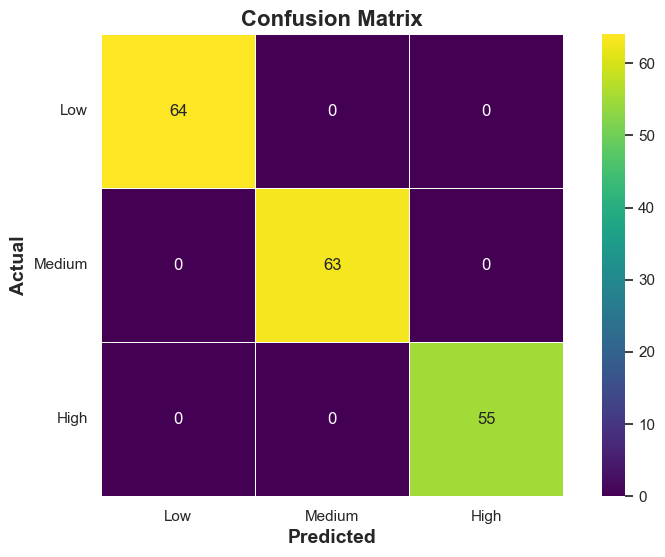

In [28]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='viridis', linewidths=0.4, square=True, cbar=True,
    xticklabels=["Low", "Medium", "High"],
    yticklabels=["Low", "Medium", "High"]
)
plt.xlabel('Predicted', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=14, fontweight='bold')
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.yticks(rotation=360)
plt.show()